In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to

print(os.listdir('../input'))


['sample_submission.csv', 'test.csv.zip', 'train.csv.zip', 'labels.csv.zip', 'train.csv', 'test.csv', 'labels.csv', 'description.md', 'GCP-Coupons-Instructions.rtf', 'sample_submission.csv.zip', 'new-york-city-taxi-fare-prediction']


In [3]:
train_df =  pd.read_csv('../input/train.csv', nrows = 10_000_000)
train_df.dtypes


key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [4]:
test_df = pd.read_csv("../input/test.csv")


In [5]:
test_df.dtypes


key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the "Manhattan vector" from
# the pickup location to the dropoff location.


def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    
    

add_travel_vector_features(train_df)


In [7]:
add_travel_vector_features(test_df)


In [8]:
train_df.columns


Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'abs_diff_longitude', 'abs_diff_latitude'],
      dtype='object')

In [9]:
print(train_df.isnull().sum())


key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude     69
dropoff_latitude      69
passenger_count        0
abs_diff_longitude    69
abs_diff_latitude     69
dtype: int64


In [10]:
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 0)
print('New size: %d' % len(train_df))


Old size: 10000000
New size: 9999931


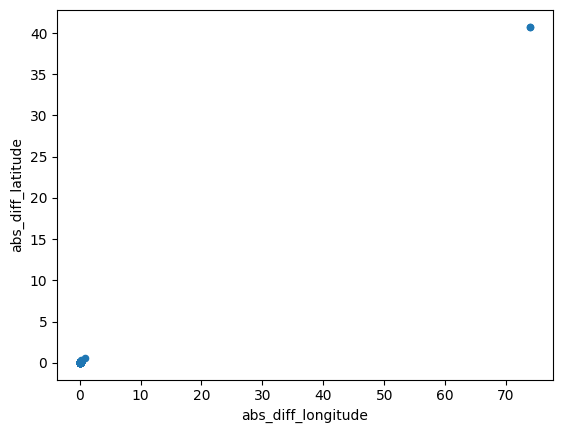

In [11]:
plot = train_df.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')


In [12]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.abs_diff_longitude  5.0) & (train_df.abs_diff_latitude  5.0)]
print('New size: %d' % len(train_df))


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2784454218.py, line 2)

In [13]:
train_df = train_df[(train_df.abs_diff_longitude  5.0) & (train_df.abs_diff_latitude  5.0)]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (659017079.py, line 1)

In [14]:
train_df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754


In [15]:
train_df['pickup_datetime'][0][11:19]


'17:26:21'

In [16]:
list1 = list(train_df['pickup_datetime'])               # Creating an extra col of pickup time,extracting from pickup_datetime

for i in range(len(list1)):
    list1[i] = list1[i][11:19]

train_df['pickup_time'] = list1



list2 = list(test_df['pickup_datetime'])

for i in range(len(list2)):
    list2[i] = list2[i][11:19]

test_df['pickup_time'] = list2
    


In [17]:
train_df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_time
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,17:26:21
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,16:52:16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,00:35:00
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,04:30:42
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,07:51:00


In [18]:
test_df.head()


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_time
0,2010-10-01 21:26:11.0000001,2010-10-01 21:26:11 UTC,-73.983130,40.761970,-73.994386,40.749236,1,0.011256,0.012734,21:26:11
1,2013-10-06 01:38:00.00000083,2013-10-06 01:38:00 UTC,-73.948505,40.753977,-73.808195,40.731952,2,0.140310,0.022025,01:38:00
2,2012-03-30 19:13:53.0000001,2012-03-30 19:13:53 UTC,-73.973964,40.791979,-73.979018,40.785544,1,0.005054,0.006435,19:13:53
3,2012-02-08 02:57:23.0000001,2012-02-08 02:57:23 UTC,-73.991478,40.738907,-73.907198,40.861572,2,0.084280,0.122665,02:57:23
4,2013-12-13 22:56:00.000000237,2013-12-13 22:56:00 UTC,-73.986281,40.740067,-73.933927,40.856781,2,0.052354,0.116714,22:56:00


In [19]:
x=pd.Timestamp(train_df['pickup_datetime'][0][:-4]).dayofweek
x


0

In [20]:
# Creating an extra col for day of the week

list1 = list(train_df['pickup_datetime'])

for i in range(len(list1)):
    list1[i] = pd.Timestamp(list1[i][:-4]).dayofweek

train_df['weekday'] = list1


list2 = list(test_df['pickup_datetime'])

for i in range(len(list2)):
    list2[i] = pd.Timestamp(list2[i][:-4]).dayofweek

test_df['weekday'] = list2


In [21]:
test_df.head()


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_time,weekday
0,2010-10-01 21:26:11.0000001,2010-10-01 21:26:11 UTC,-73.983130,40.761970,-73.994386,40.749236,1,0.011256,0.012734,21:26:11,4
1,2013-10-06 01:38:00.00000083,2013-10-06 01:38:00 UTC,-73.948505,40.753977,-73.808195,40.731952,2,0.140310,0.022025,01:38:00,6
2,2012-03-30 19:13:53.0000001,2012-03-30 19:13:53 UTC,-73.973964,40.791979,-73.979018,40.785544,1,0.005054,0.006435,19:13:53,4
3,2012-02-08 02:57:23.0000001,2012-02-08 02:57:23 UTC,-73.991478,40.738907,-73.907198,40.861572,2,0.084280,0.122665,02:57:23,2
4,2013-12-13 22:56:00.000000237,2013-12-13 22:56:00 UTC,-73.986281,40.740067,-73.933927,40.856781,2,0.052354,0.116714,22:56:00,4


In [22]:
# Dropping "pickup_datetime" col

train_df.drop("pickup_datetime",axis=1,inplace=True)
test_df.drop("pickup_datetime",axis=1,inplace=True)


In [23]:
test_df.head()


,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_time,weekday
0,2010-10-01 21:26:11.0000001,-73.983130,40.761970,-73.994386,40.749236,1,0.011256,0.012734,21:26:11,4
1,2013-10-06 01:38:00.00000083,-73.948505,40.753977,-73.808195,40.731952,2,0.140310,0.022025,01:38:00,6
2,2012-03-30 19:13:53.0000001,-73.973964,40.791979,-73.979018,40.785544,1,0.005054,0.006435,19:13:53,4
3,2012-02-08 02:57:23.0000001,-73.991478,40.738907,-73.907198,40.861572,2,0.084280,0.122665,02:57:23,2
4,2013-12-13 22:56:00.000000237,-73.986281,40.740067,-73.933927,40.856781,2,0.052354,0.116714,22:56:00,4


In [24]:
train_df.head()


,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_time,weekday
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,17:26:21,0
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,16:52:16,1
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,00:35:00,3
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,04:30:42,5
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,07:51:00,1


In [25]:
col = test_df.columns.tolist()
col = col[:6] + col[8:] +col[6:8]
col

test_df = test_df[col]
test_df.head()


,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time,weekday,abs_diff_longitude,abs_diff_latitude
0,2010-10-01 21:26:11.0000001,-73.983130,40.761970,-73.994386,40.749236,1,21:26:11,4,0.011256,0.012734
1,2013-10-06 01:38:00.00000083,-73.948505,40.753977,-73.808195,40.731952,2,01:38:00,6,0.140310,0.022025
2,2012-03-30 19:13:53.0000001,-73.973964,40.791979,-73.979018,40.785544,1,19:13:53,4,0.005054,0.006435
3,2012-02-08 02:57:23.0000001,-73.991478,40.738907,-73.907198,40.861572,2,02:57:23,2,0.084280,0.122665
4,2013-12-13 22:56:00.000000237,-73.986281,40.740067,-73.933927,40.856781,2,22:56:00,4,0.052354,0.116714


In [26]:
train_df.shape


(9999931, 11)

In [27]:
train_df['weekday'].replace(to_replace=[i for i in range(0,7)],
                           value=["monday","tuesday",'wednesday','thursday','friday','saturday','sunday'],
                           inplace=True)

test_df['weekday'].replace(to_replace=[i for i in range(0,7)],
                           value=["monday","tuesday",'wednesday','thursday','friday','saturday','sunday'],
                           inplace=True)


/tmp/ipykernel_8/4249729490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['weekday'].replace(to_replace=[i for i in range(0,7)],
/tmp/ipykernel_8/4249729490.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [28]:
train_df.head()


,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_time,weekday
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,17:26:21,monday
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,16:52:16,tuesday
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,00:35:00,thursday
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,04:30:42,saturday
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,07:51:00,tuesday


In [29]:
test_df.head()


,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time,weekday,abs_diff_longitude,abs_diff_latitude
0,2010-10-01 21:26:11.0000001,-73.983130,40.761970,-73.994386,40.749236,1,21:26:11,friday,0.011256,0.012734
1,2013-10-06 01:38:00.00000083,-73.948505,40.753977,-73.808195,40.731952,2,01:38:00,sunday,0.140310,0.022025
2,2012-03-30 19:13:53.0000001,-73.973964,40.791979,-73.979018,40.785544,1,19:13:53,friday,0.005054,0.006435
3,2012-02-08 02:57:23.0000001,-73.991478,40.738907,-73.907198,40.861572,2,02:57:23,wednesday,0.084280,0.122665
4,2013-12-13 22:56:00.000000237,-73.986281,40.740067,-73.933927,40.856781,2,22:56:00,friday,0.052354,0.116714


In [30]:
train_one_hot = pd.get_dummies(train_df['weekday'])
train_df = pd.concat([train_df,train_one_hot],axis=1)

test_one_hot = pd.get_dummies(test_df['weekday'])
test_df = pd.concat([test_df,test_one_hot],axis=1)


In [31]:
test_df.head()


,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time,weekday,abs_diff_longitude,abs_diff_latitude,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,2010-10-01 21:26:11.0000001,-73.983130,40.761970,-73.994386,40.749236,1,21:26:11,friday,0.011256,0.012734,True,False,False,False,False,False,False
1,2013-10-06 01:38:00.00000083,-73.948505,40.753977,-73.808195,40.731952,2,01:38:00,sunday,0.140310,0.022025,False,False,False,True,False,False,False
2,2012-03-30 19:13:53.0000001,-73.973964,40.791979,-73.979018,40.785544,1,19:13:53,friday,0.005054,0.006435,True,False,False,False,False,False,False
3,2012-02-08 02:57:23.0000001,-73.991478,40.738907,-73.907198,40.861572,2,02:57:23,wednesday,0.084280,0.122665,False,False,False,False,False,False,True
4,2013-12-13 22:56:00.000000237,-73.986281,40.740067,-73.933927,40.856781,2,22:56:00,friday,0.052354,0.116714,True,False,False,False,False,False,False


In [32]:
train_df.head()


,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_time,weekday,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,17:26:21,monday,False,True,False,False,False,False,False
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,16:52:16,tuesday,False,False,False,False,False,True,False
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,00:35:00,thursday,False,False,False,False,True,False,False
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,04:30:42,saturday,False,False,True,False,False,False,False
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,07:51:00,tuesday,False,False,False,False,False,True,False


In [33]:
train_df.drop("weekday",axis=1,inplace=True)
test_df.drop("weekday",axis=1,inplace=True)


In [34]:
a = train_df['pickup_time'][0].split(":")
(int(a[0])*100) + int(a[1]) + float(a[2])/100


1726.21

In [35]:
# Converting pickup_time to float

list1 = list(train_df['pickup_time'])
for i in range(len(list1)):
    a = list1[i].split(":")
    list1[i] = (int(a[0])*100) + int(a[1]) + float(a[2])/100

train_df['pickup_time'] = list1

list2 = list(test_df['pickup_time'])
for i in range(len(list2)):
    a = list2[i].split(":")
    list2[i] = (int(a[0])*100) + int(a[1]) + float(a[2])/100

test_df['pickup_time'] = list2


In [36]:
train_df.head()


,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_time,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,1726.21,False,True,False,False,False,False,False
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,1652.16,False,False,False,False,False,True,False
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,35.00,False,False,False,False,True,False,False
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,430.42,False,False,True,False,False,False,False
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,751.00,False,False,False,False,False,True,False


In [37]:
test_df.head()


,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_time,abs_diff_longitude,abs_diff_latitude,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,2010-10-01 21:26:11.0000001,-73.983130,40.761970,-73.994386,40.749236,1,2126.11,0.011256,0.012734,True,False,False,False,False,False,False
1,2013-10-06 01:38:00.00000083,-73.948505,40.753977,-73.808195,40.731952,2,138.00,0.140310,0.022025,False,False,False,True,False,False,False
2,2012-03-30 19:13:53.0000001,-73.973964,40.791979,-73.979018,40.785544,1,1913.53,0.005054,0.006435,True,False,False,False,False,False,False
3,2012-02-08 02:57:23.0000001,-73.991478,40.738907,-73.907198,40.861572,2,257.23,0.084280,0.122665,False,False,False,False,False,False,True
4,2013-12-13 22:56:00.000000237,-73.986281,40.740067,-73.933927,40.856781,2,2256.00,0.052354,0.116714,True,False,False,False,False,False,False


In [38]:
# rearranging cols
test_df = test_df[train_df.drop('fare_amount',axis=1).columns]


In [39]:
test_df.head()


,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_time,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,2010-10-01 21:26:11.0000001,-73.983130,40.761970,-73.994386,40.749236,1,0.011256,0.012734,2126.11,True,False,False,False,False,False,False
1,2013-10-06 01:38:00.00000083,-73.948505,40.753977,-73.808195,40.731952,2,0.140310,0.022025,138.00,False,False,False,True,False,False,False
2,2012-03-30 19:13:53.0000001,-73.973964,40.791979,-73.979018,40.785544,1,0.005054,0.006435,1913.53,True,False,False,False,False,False,False
3,2012-02-08 02:57:23.0000001,-73.991478,40.738907,-73.907198,40.861572,2,0.084280,0.122665,257.23,False,False,False,False,False,False,True
4,2013-12-13 22:56:00.000000237,-73.986281,40.740067,-73.933927,40.856781,2,0.052354,0.116714,2256.00,True,False,False,False,False,False,False


In [40]:
train_df.head()


,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_time,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,1726.21,False,True,False,False,False,False,False
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,1652.16,False,False,False,False,False,True,False
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,35.00,False,False,False,False,True,False,False
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,430.42,False,False,True,False,False,False,False
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,751.00,False,False,False,False,False,True,False


In [41]:
# Calculating distance in kms

R = 6373.0
lat1 =np.asarray(np.radians(train_df['pickup_latitude']))
lon1 = np.asarray(np.radians(train_df['pickup_longitude']))
lat2 = np.asarray(np.radians(train_df['dropoff_latitude']))
lon2 = np.asarray(np.radians(train_df['dropoff_longitude']))

dlon = lon2 - lon1
dlat = lat2 - lat1
ls1=[] 
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/ 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c

    
train_df['Distance']=np.asarray(distance)*0.621



lat1 =np.asarray(np.radians(test_df['pickup_latitude']))
lon1 = np.asarray(np.radians(test_df['pickup_longitude']))
lat2 = np.asarray(np.radians(test_df['dropoff_latitude']))
lon2 = np.asarray(np.radians(test_df['dropoff_longitude']))

dlon = lon2 - lon1
dlat = lat2 - lat1
 
a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/ 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c
test_df['Distance']=np.asarray(distance)*0.621


In [42]:
train_df.head()


,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_time,friday,monday,saturday,sunday,thursday,tuesday,wednesday,Distance
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,1726.21,False,True,False,False,False,False,False,0.640305
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,1652.16,False,False,False,False,False,True,False,5.249180
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,35.00,False,False,False,False,True,False,False,0.863166
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,430.42,False,False,True,False,False,False,False,1.738893
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,751.00,False,False,False,False,False,True,False,1.241866


In [43]:
test_df.head()


,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_time,friday,monday,saturday,sunday,thursday,tuesday,wednesday,Distance
0,2010-10-01 21:26:11.0000001,-73.983130,40.761970,-73.994386,40.749236,1,0.011256,0.012734,2126.11,True,False,False,False,False,False,False,1.058553
1,2013-10-06 01:38:00.00000083,-73.948505,40.753977,-73.808195,40.731952,2,0.140310,0.022025,138.00,False,False,False,True,False,False,False,7.498840
2,2012-03-30 19:13:53.0000001,-73.973964,40.791979,-73.979018,40.785544,1,0.005054,0.006435,1913.53,True,False,False,False,False,False,False,0.517137
3,2012-02-08 02:57:23.0000001,-73.991478,40.738907,-73.907198,40.861572,2,0.084280,0.122665,257.23,False,False,False,False,False,False,True,9.550439
4,2013-12-13 22:56:00.000000237,-73.986281,40.740067,-73.933927,40.856781,2,0.052354,0.116714,2256.00,True,False,False,False,False,False,False,8.513993


In [44]:
# Calculated distances in ref to the airport

R = 6373.0
lat1 =np.asarray(np.radians(train_df['pickup_latitude']))
lon1 = np.asarray(np.radians(train_df['pickup_longitude']))
lat2 = np.asarray(np.radians(train_df['dropoff_latitude']))
lon2 = np.asarray(np.radians(train_df['dropoff_longitude']))

lat3=np.zeros(len(train_df))+np.radians(40.6413111)
lon3=np.zeros(len(train_df))+np.radians(-73.7781391)
dlon_pickup = lon3 - lon1
dlat_pickup = lat3 - lat1
d_lon_dropoff=lon3 -lon2
d_lat_dropoff=lat3-lat2
a1 = np.sin(dlat_pickup/2)**2 + np.cos(lat1) * np.cos(lat3) * np.sin(dlon_pickup/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1
train_df['Pickup_Distance_airport']=np.asarray(distance1)*0.621

a2=np.sin(d_lat_dropoff/2)**2 + np.cos(lat2) * np.cos(lat3) * np.sin(d_lon_dropoff/ 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
distance2 = R * c2

    
train_df['Dropoff_Distance_airport']=np.asarray(distance2)*0.621



lat1 =np.asarray(np.radians(test_df['pickup_latitude']))
lon1 = np.asarray(np.radians(test_df['pickup_longitude']))
lat2 = np.asarray(np.radians(test_df['dropoff_latitude']))
lon2 = np.asarray(np.radians(test_df['dropoff_longitude']))

lat3=np.zeros(len(test_df))+np.radians(40.6413111)
lon3=np.zeros(len(test_df))+np.radians(-73.7781391)
dlon_pickup = lon3 - lon1
dlat_pickup = lat3 - lat1
d_lon_dropoff=lon3 -lon2
d_lat_dropoff=lat3-lat2
a1 = np.sin(dlat_pickup/2)**2 + np.cos(lat1) * np.cos(lat3) * np.sin(dlon_pickup/ 2)**2
c1 = 2 * np.arctan2(np.sqrt(a1), np.sqrt(1 - a1))
distance1 = R * c1
test_df['Pickup_Distance_airport']=np.asarray(distance1)*0.621

a2=np.sin(d_lat_dropoff/2)**2 + np.cos(lat2) * np.cos(lat3) * np.sin(d_lon_dropoff/ 2)**2
c2 = 2 * np.arctan2(np.sqrt(a2), np.sqrt(1 - a2))
distance2 = R * c2

test_df['Dropoff_Distance_airport']=np.asarray(distance2)*0.621


In [45]:
# Rounding off data to two decimal places

train_df['Distance']=np.round(train_df['Distance'],2)
train_df['Pickup_Distance_airport']=np.round(train_df['Pickup_Distance_airport'],2)
train_df['Dropoff_Distance_airport']=np.round(train_df['Dropoff_Distance_airport'],2)

test_df['Distance']=np.round(test_df['Distance'],2)
test_df['Pickup_Distance_airport']=np.round(test_df['Pickup_Distance_airport'],2)
test_df['Dropoff_Distance_airport']=np.round(test_df['Dropoff_Distance_airport'],2)


In [46]:
train_df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)
test_df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)


In [47]:
train_df.head()


,key,fare_amount,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_time,friday,monday,saturday,sunday,thursday,tuesday,wednesday,Distance,Pickup_Distance_airport,Dropoff_Distance_airport
0,2009-06-15 17:26:21.0000001,4.5,1,0.002701,0.009041,1726.21,False,True,False,False,False,False,False,0.64,6.52,5.92
1,2010-01-05 16:52:16.0000002,16.9,1,0.036780,0.070701,1652.16,False,False,False,False,False,True,False,5.25,13.37,14.33
2,2011-08-18 00:35:00.00000049,5.7,2,0.008504,0.010708,35.00,False,False,False,False,True,False,False,0.86,13.54,13.47
3,2012-04-21 04:30:42.0000001,7.7,1,0.004437,0.024949,430.42,False,False,True,False,False,False,False,1.74,12.65,13.78
4,2010-03-09 07:51:00.000000135,5.3,1,0.011440,0.015754,751.00,False,False,False,False,False,True,False,1.24,13.25,13.57


In [48]:
test_df.head()


,key,passenger_count,abs_diff_longitude,abs_diff_latitude,pickup_time,friday,monday,saturday,sunday,thursday,tuesday,wednesday,Distance,Pickup_Distance_airport,Dropoff_Distance_airport
0,2010-10-01 21:26:11.0000001,1,0.011256,0.012734,2126.11,True,False,False,False,False,False,False,1.06,13.59,13.56
1,2013-10-06 01:38:00.00000083,2,0.140310,0.022025,138.00,False,False,False,True,False,False,False,7.50,11.84,6.46
2,2012-03-30 19:13:53.0000001,1,0.005054,0.006435,1913.53,True,False,False,False,False,False,False,0.52,14.61,14.49
3,2012-02-08 02:57:23.0000001,2,0.084280,0.122665,257.23,False,False,False,False,False,False,True,9.55,13.05,16.65
4,2013-12-13 22:56:00.000000237,2,0.052354,0.116714,2256.00,True,False,False,False,False,False,False,8.51,12.86,16.97


In [49]:
print(train_df.shape , test_df.shape)


(9999931, 16) (9914, 15)


In [50]:
from sklearn.model_selection import train_test_split

X=train_df.drop(['key','fare_amount'],axis=1)
y=train_df['fare_amount']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01,random_state=80)


In [51]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(9899931, 14) (9899931,)
(100000, 14) (100000,)


In [52]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)


0.0009305759670410474

In [53]:
predictions = reg.predict(test_df.drop("key",axis=1))
predictions = np.round(predictions,2)
predictions


array([11.13, 11.93, 11.19, ..., 11.47, 11.2 , 11.49])

In [54]:
Submission=pd.DataFrame(data=predictions,columns=['fare_amount'])

Submission['key']=test_df['key']

Submission=Submission[['key','fare_amount']]


In [55]:
Submission.set_index('key',inplace=True)


In [56]:
Submission.reset_index().head()


,key,fare_amount
0,2010-10-01 21:26:11.0000001,11.13
1,2013-10-06 01:38:00.00000083,11.93
2,2012-03-30 19:13:53.0000001,11.19
3,2012-02-08 02:57:23.0000001,11.64
4,2013-12-13 22:56:00.000000237,11.21


In [57]:
Submission.to_csv('Submission.csv')
